In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import seaborn as sns
import scipy.stats as stats

import nltk
nltk.download('averaged_perceptron_tagger')
import spacy

from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.simplefilter("ignore")

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/minhwa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Load Dataset for results and plots

`p2c` is the cleaned dataset from dynasent2 (or p2c dataset) that were adjusted for our research. 

In [2]:
p2c = pd.read_csv('dynanset2_pref_df_with_all_semantic.csv')
p2c_emotion = p2c[['sent_1', 'sent_2', 'gold_label', 'subjective_pref', 'generative_pref']]

In [3]:
p2c_emotion.head()

,sent_1,sent_2,gold_label,subjective_pref,generative_pref
0,We enjoyed our first and last meal in Toronto ...,So glad I finally tried this place because if ...,positive,2,0
1,I tried a new place. I can't wait to return an...,"It was cool. She used all organic, vegan and g...",positive,0,1
2,"The buffalo chicken was not good, but very cos...",There was so much stuff from all over that I h...,negative,1,0
3,The hotel offered complimentary breakfast.,My friends had a full acrylic and the other ha...,positive,0,0
4,It work very well,The free sourdough was delicious and offered w...,positive,2,1


In [4]:
hm_anger = '../data/hummingbird/tokens_avg/anger_features.tsv'
hm_disgust = '../data/hummingbird/tokens_avg/disgust_features.tsv'
hm_fear = '../data/hummingbird/tokens_avg/fear_features.tsv'
hm_joy = '../data/hummingbird/tokens_avg/joy_features.tsv'
hm_offensive = '../data/hummingbird/tokens_avg/offensive_features.tsv'
hm_politeness = '../data/hummingbird/tokens_avg/politeness_features.tsv'
hm_sadness = '../data/hummingbird/tokens_avg/sadness_features.tsv'
hm_sentiment = '../data/hummingbird/tokens_avg/sentiment_features.tsv'

In [5]:
anger = pd.read_csv(hm_anger, sep='\t')[['word', 'avg_attr']]
disgust = pd.read_csv(hm_disgust, sep='\t')[['word', 'avg_attr']]
fear = pd.read_csv(hm_fear, sep='\t')[['word', 'avg_attr']]
joy = pd.read_csv(hm_joy, sep='\t')[['word', 'avg_attr']]
offensive = pd.read_csv(hm_offensive, sep='\t')[['word', 'avg_attr']]
politeness = pd.read_csv(hm_politeness, sep='\t')[['word', 'avg_attr']]
sadness = pd.read_csv(hm_sadness, sep='\t')[['word', 'avg_attr']]
sentiment = pd.read_csv(hm_sentiment, sep='\t')[['word', 'avg_attr']]

# Compute Sentiment Lexicon for each sentence pair

In [6]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")

In [7]:
def compute_style_words(style_type_df, sentence):

    doc = nlp(sentence)
    lemmatized_words = [token.lemma_ if token.pos_ in {"NOUN", "VERB"} else token.text for token in doc]
    match_val_dict = {}

    for word in lemmatized_words:
        if word in style_type_df['word'].values:
            match_val = style_type_df[style_type_df['word'] == word]['avg_attr'].values[0] 
            match_val_dict[word] = round(match_val, 4)

    sorted_dict_desc = dict(sorted(match_val_dict.items(), key=lambda item: item[1], reverse=True))

    return sorted_dict_desc

In [8]:
p2c_emotion['sent_1_anger_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(anger, x.sent_1), axis=1)
p2c_emotion['sent_2_anger_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(anger, x.sent_2), axis=1)

100%|██████████| 5000/5000 [00:31<00:00, 159.77it/s]


In [9]:
p2c_emotion['sent_1_disgust_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(disgust, x.sent_1), axis=1)
p2c_emotion['sent_2_disgust_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(disgust, x.sent_2), axis=1)

100%|██████████| 5000/5000 [00:30<00:00, 162.00it/s]


In [10]:
p2c_emotion['sent_1_fear_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(fear, x.sent_1), axis=1)
p2c_emotion['sent_2_fear_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(fear, x.sent_2), axis=1)

100%|██████████| 5000/5000 [00:31<00:00, 161.29it/s]


In [11]:
p2c_emotion['sent_1_joy_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(joy, x.sent_1), axis=1)
p2c_emotion['sent_2_joy_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(joy, x.sent_2), axis=1)

100%|██████████| 5000/5000 [00:31<00:00, 157.30it/s]


In [12]:
p2c_emotion['sent_1_offensive_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(offensive, x.sent_1), axis=1)
p2c_emotion['sent_2_offensive_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(offensive, x.sent_2), axis=1)

100%|██████████| 5000/5000 [00:31<00:00, 157.57it/s]


In [13]:
p2c_emotion['sent_1_polite_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(politeness, x.sent_1), axis=1)
p2c_emotion['sent_2_polite_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(politeness, x.sent_2), axis=1)

100%|██████████| 5000/5000 [00:31<00:00, 157.16it/s]


In [14]:
p2c_emotion['sent_1_sad_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(sadness, x.sent_1), axis=1)
p2c_emotion['sent_2_sad_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(sadness, x.sent_2), axis=1)

100%|██████████| 5000/5000 [00:31<00:00, 156.85it/s]


In [15]:
p2c_emotion['sent_1_sentiment_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(sentiment, x.sent_1), axis=1)
p2c_emotion['sent_2_sentiment_words'] = p2c_emotion.progress_apply(lambda x: compute_style_words(sentiment, x.sent_2), axis=1)

100%|██████████| 5000/5000 [00:31<00:00, 159.90it/s]


In [16]:
p2c_emotion.head()

,sent_1,sent_2,gold_label,subjective_pref,generative_pref,sent_1_anger_words,sent_2_anger_words,sent_1_disgust_words,sent_2_disgust_words,sent_1_fear_words,...,sent_1_joy_words,sent_2_joy_words,sent_1_offensive_words,sent_2_offensive_words,sent_1_polite_words,sent_2_polite_words,sent_1_sad_words,sent_2_sad_words,sent_1_sentiment_words,sent_2_sentiment_words
0,We enjoyed our first and last meal in Toronto ...,So glad I finally tried this place because if ...,positive,2,0,"{'last': 0.1111, 'better': 0.1111, 'a': 0.043,...","{'my': 0.0536, 'it': 0.0447, 'a': 0.043, 'who'...","{'of': 0.0325, 'to': 0.0308, 'our': 0.0278, 't...","{'rate': 0.3333, 'finally': 0.1666, 'this': 0....","{'first': 0.0417, 'at': 0.0312, 'a': 0.0184, '...",...,"{'enjoy': 0.3333, 'better': 0.3333, 'our': 0.0...","{'glad': 0.3333, 'place': 0.1666, 'who': 0.020...","{'our': 0.0556, 'way': 0.0555, 'a': 0.0541, 'o...","{'finally': 0.1666, 'a': 0.0541, 'if': 0.046, ...","{'enjoy': 0.3334, 'book': 0.3333, 'journey': 0...","{'glad': 0.1666, 'if': 0.0115, 'that': 0.0072,...","{'our': 0.0833, 'to': 0.041, 'in': 0.0251, 'of...","{'finally': 0.3334, 'rate': 0.3333, '10': 0.16...","{'enjoy': 0.5, 'better': 0.2222, 'last': 0.111...","{'glad': 0.5, 'try': 0.3333, 'place': 0.0, 'be..."
1,I tried a new place. I can't wait to return an...,"It was cool. She used all organic, vegan and g...",positive,0,1,"{'wait': 0.0667, 'a': 0.043, 'more': 0.0303, '...","{'use': 0.0833, 'was': 0.0714, 'my': 0.0536, '...","{'wait': 0.0667, 'more': 0.0606, 'to': 0.0308,...","{'make': 0.0555, 'all': 0.046, 'my': 0.0357, '...","{'a': 0.0184, 'to': 0.0171, 'and': 0.0109, 'tr...",...,"{'place': 0.1666, 'new': 0.1429, 'more': 0.030...","{'amazing': 1.0, 'feel': 0.25, 'look': 0.1515,...","{'a': 0.0541, 'more': 0.0303, 'to': 0.0154, 'a...","{'cool': 0.3333, 'free': 0.3333, 'amazing': 0....","{'to': 0.0017, 'try': 0.0, 'new': 0.0, 'place'...","{'amazing': 0.6667, 'look': 0.0606, 'my': 0.00...","{'to': 0.041, 'more': 0.0303, 'a': 0.0209, 'an...","{'free': 0.3333, 'feel': 0.1667, 'look': 0.060...","{'try': 0.3333, 'return': 0.3333, 'more': 0.04...","{'amazing': 1.0, 'look': 0.2121, 'which': 0.03..."
2,"The buffalo chicken was not good, but very cos...",There was so much stuff from all over that I h...,negative,1,0,"{'very': 0.1111, 'was': 0.0714, 'not': 0.0629,...","{'over': 0.1667, 'leave': 0.1667, 'cash': 0.16...","{'chicken': 0.3333, 'very': 0.1667, 'not': 0.1...","{'leave': 0.1667, 'cash': 0.1666, 'find': 0.12...","{'not': 0.044, 'very': 0.0278, 'good': 0.0222,...",...,"{'good': 0.6, 'not': 0.0189, 'but': 0.0068, 'c...","{'cash': 0.1666, 'over': 0.0667, 'so': 0.049, ...","{'was': 0.0476, 'not': 0.0377, 'very': 0.0278,...","{'be': 0.0444, 'much': 0.0417, 'have': 0.0385,...","{'good': 0.3333, 'very': 0.1111, 'but': 0.0068...","{'have': 0.0449, 'much': 0.0417, 'for': 0.0135...","{'chicken': 0.3333, 'very': 0.1389, 'not': 0.0...","{'leave': 0.25, 'over': 0.1, 'have': 0.0449, '...","{'good': 0.4445, 'but': -0.0272, 'was': -0.059...","{'more': 0.0454, 'all': 0.0115, 'so': 0.0098, ..."
3,The hotel offered complimentary breakfast.,My friends had a full acrylic and the other ha...,positive,0,0,{},"{'other': 0.1111, 'have': 0.0449, 'good': 0.04...",{},"{'other': 0.1111, 'so': 0.0294, 'the': 0.0293,...",{},...,{},"{'good': 0.6, 'look': 0.1515, 'so': 0.049, 'a'...",{},"{'other': 0.1111, 'full': 0.0833, 'look': 0.06...",{},"{'friend': 0.3334, 'good': 0.3333, 'look': 0.0...",{},"{'full': 0.25, 'look': 0.0606, 'have': 0.0449,...",{},"{'good': 0.4445, 'look': 0.2121, 'full': 0.083..."
4,It work very well,The free sourdough was delicious and offered w...,positive,2,1,"{'very': 0.1111, 'well': 0.0303, 'work': 0.0222}","{'was': 0.0714, 'an': 0.0303, 'of': 0.0224, 'w...","{'very': 0.1667, 'work': 0.0222, 'well': 0.0}","{'of': 0.0325, 'an': 0.0242, 'was': 0.0238, 'a...","{'very': 0.0278, 'work': 0.0222, 'well': 0.0}",...,"{'work': 0.0889, 'well': 0.0606, 'very': 0.0}","{'delicious': 0.3333, 'with': 0.0287, 'of': 0....","

# Maximum Important Lexicon Comparison

- Positive: joy, politeness, sentiment (positive > 0)
- Negative: anger, disgust, fear, offensive, sadness, sentiment (negative < 0)

In [17]:
def decide_sentence_with_more(df):

    win_sent = []

    for i in range(df.shape[0]):

        sentiment_label = df.iloc[i]['gold_label']
        sent1_win = 0
        sent2_win = 0
        tie = 0

        if sentiment_label == 'positive':

            sent1_joy = df.iloc[i]['sent_1_joy_words']
            sent2_joy = df.iloc[i]['sent_2_joy_words']

            sent1_polite = df.iloc[i]['sent_1_polite_words']
            sent1_polite = {key: value for key, value in sent1_polite.items() if value > 0}
            sent2_polite = df.iloc[i]['sent_2_polite_words']
            sent2_polite = {key: value for key, value in sent2_polite.items() if value > 0}
            
            sent1_pos = df.iloc[i]['sent_1_sentiment_words']
            sent1_pos = {key: value for key, value in sent1_pos.items() if value > 0}
            sent2_pos = df.iloc[i]['sent_2_sentiment_words']
            sent2_pos = {key: value for key, value in sent2_pos.items() if value > 0}

            if next(iter(sent1_joy.values()), 0) > next(iter(sent2_joy.values()), 0):
                sent1_win += 1
            elif next(iter(sent1_joy.values()), 0) < next(iter(sent2_joy.values()), 0):
                sent2_win += 1 
            else:
                tie += 1

            if next(iter(sent1_polite.values()), 0) > next(iter(sent2_polite.values()), 0):
                sent1_win += 1
            elif next(iter(sent1_polite.values()), 0) < next(iter(sent2_polite.values()), 0):
                sent2_win += 1 
            else:
                tie += 1
            
            if next(iter(sent1_pos.values()), 0) > next(iter(sent2_pos.values()), 0):
                sent1_win += 1
            elif next(iter(sent1_pos.values()), 0) < next(iter(sent2_pos.values()), 0):
                sent2_win += 1 
            else:
                tie += 1

        elif sentiment_label == 'negative':

            sent1_anger = df.iloc[i]['sent_1_anger_words']
            sent2_anger = df.iloc[i]['sent_2_anger_words']

            sent1_disgust = df.iloc[i]['sent_1_disgust_words']
            sent2_disgust = df.iloc[i]['sent_2_disgust_words']

            sent1_fear = df.iloc[i]['sent_1_fear_words']
            sent2_fear = df.iloc[i]['sent_2_fear_words']

            sent1_offend = df.iloc[i]['sent_1_offensive_words']
            sent2_offend = df.iloc[i]['sent_2_offensive_words']

            sent1_sad = df.iloc[i]['sent_1_sad_words']
            sent2_sad = df.iloc[i]['sent_2_sad_words']

            sent1_rude = df.iloc[i]['sent_1_polite_words']
            sent1_rude = dict(sorted(sent1_rude.items(), key=lambda item: item[1], reverse=False))
            sent2_rude = df.iloc[i]['sent_2_polite_words']
            sent2_rude = dict(sorted(sent2_rude.items(), key=lambda item: item[1], reverse=False))
            
            sent1_neg = df.iloc[i]['sent_1_sentiment_words']
            sent1_neg = dict(sorted(sent1_neg.items(), key=lambda item: item[1], reverse=False))
            sent2_neg = df.iloc[i]['sent_2_sentiment_words']
            sent2_neg = dict(sorted(sent2_neg.items(), key=lambda item: item[1], reverse=False))

            if next(iter(sent1_anger.values()), 0) > next(iter(sent2_anger.values()), 0):
                sent1_win += 1
            elif next(iter(sent1_anger.values()), 0) < next(iter(sent2_anger.values()), 0):
                sent2_win += 1 
            else:
                tie += 1

            if next(iter(sent1_disgust.values()), 0) > next(iter(sent2_disgust.values()), 0):
                sent1_win += 1
            elif next(iter(sent1_disgust.values()), 0) < next(iter(sent2_disgust.values()), 0):
                sent2_win += 1 
            else:
                tie += 1

            if next(iter(sent1_fear.values()), 0) > next(iter(sent2_fear.values()), 0):
                sent1_win += 1
            elif next(iter(sent1_fear.values()), 0) < next(iter(sent2_fear.values()), 0):
                sent2_win += 1 
            else:
                tie += 1

            if next(iter(sent1_offend.values()), 0) > next(iter(sent2_offend.values()), 0):
                sent1_win += 1
            elif next(iter(sent1_offend.values()), 0) < next(iter(sent2_offend.values()), 0):
                sent2_win += 1 
            else:
                tie += 1

            if next(iter(sent1_sad.values()), 0) > next(iter(sent2_sad.values()), 0):
                sent1_win += 1
            elif next(iter(sent1_sad.values()), 0) < next(iter(sent2_sad.values()), 0):
                sent2_win += 1 
            else:
                tie += 1
            
            if abs(next(iter(sent1_rude.values()), 0)) > abs(next(iter(sent2_rude.values()), 0)):
                sent1_win += 1
            elif abs(next(iter(sent1_rude.values()), 0)) < abs(next(iter(sent2_rude.values()), 0)):
                sent2_win += 1 
            else:
                tie += 1            

            if abs(next(iter(sent1_neg.values()), 0)) > abs(next(iter(sent2_neg.values()), 0)):
                sent1_win += 1
            elif abs(next(iter(sent1_neg.values()), 0)) < abs(next(iter(sent2_neg.values()), 0)):
                sent2_win += 1 
            else:
                tie += 1


        win_pref = np.argmax([sent1_win, sent2_win, tie])
        win_sent.append(win_pref)

    return win_sent


Only extract data whose sentiment label is positive or negative -> `p2c_emotion_pos_neg`

In [18]:
p2c_emotion_pos_neg = p2c_emotion.loc[p2c_emotion.gold_label != 'neutral'].reset_index(drop=True)

# Compute Lexicon-based preference for each pair

In [19]:
win_sent_lst = decide_sentence_with_more(p2c_emotion_pos_neg)
p2c_emotion_pos_neg['win_sent'] = win_sent_lst

# Pearson's r correlation (entire dataset)

Lexicon ~ Human Pref

In [20]:
stats.pearsonr(p2c_emotion_pos_neg['win_sent'], p2c_emotion_pos_neg['subjective_pref'])

PearsonRResult(statistic=-0.05290411434331863, pvalue=0.002231512699803193)

Lexicon ~ GPT-3 Pref

In [21]:
stats.pearsonr(p2c_emotion_pos_neg['win_sent'], p2c_emotion_pos_neg['generative_pref'])

PearsonRResult(statistic=0.15291961929640743, pvalue=6.450756547752474e-19)

# Compute Lexicon Importance Difference 

In [22]:
def compute_lexicon_gap(df):

    perception_gap = []

    for i in range(df.shape[0]):

        sentiment_label = df.iloc[i]['gold_label']
        diff_gap = 0

        if sentiment_label == 'positive':

            sent1_joy = df.iloc[i]['sent_1_joy_words']
            sent2_joy = df.iloc[i]['sent_2_joy_words']

            sent1_polite = df.iloc[i]['sent_1_polite_words']
            sent1_polite = {key: value for key, value in sent1_polite.items() if value > 0}
            sent2_polite = df.iloc[i]['sent_2_polite_words']
            sent2_polite = {key: value for key, value in sent2_polite.items() if value > 0}
            
            sent1_pos = df.iloc[i]['sent_1_sentiment_words']
            sent1_pos = {key: value for key, value in sent1_pos.items() if value > 0}
            sent2_pos = df.iloc[i]['sent_2_sentiment_words']
            sent2_pos = {key: value for key, value in sent2_pos.items() if value > 0}

        
            joy_gap = abs(next(iter(sent1_joy.values()), 0) - next(iter(sent2_joy.values()), 0))
            diff_gap += joy_gap

            polite_gap = abs(next(iter(sent1_polite.values()), 0) - next(iter(sent2_polite.values()), 0))
            diff_gap += polite_gap
            
            pos_gap = abs(next(iter(sent1_pos.values()), 0) - next(iter(sent2_pos.values()), 0))
            diff_gap += pos_gap 

        elif sentiment_label == 'negative':

            sent1_anger = df.iloc[i]['sent_1_anger_words']
            sent2_anger = df.iloc[i]['sent_2_anger_words']

            sent1_disgust = df.iloc[i]['sent_1_disgust_words']
            sent2_disgust = df.iloc[i]['sent_2_disgust_words']

            sent1_fear = df.iloc[i]['sent_1_fear_words']
            sent2_fear = df.iloc[i]['sent_2_fear_words']

            sent1_offend = df.iloc[i]['sent_1_offensive_words']
            sent2_offend = df.iloc[i]['sent_2_offensive_words']

            sent1_sad = df.iloc[i]['sent_1_sad_words']
            sent2_sad = df.iloc[i]['sent_2_sad_words']

            sent1_rude = df.iloc[i]['sent_1_polite_words']
            sent1_rude = dict(sorted(sent1_rude.items(), key=lambda item: item[1], reverse=False))
            sent2_rude = df.iloc[i]['sent_2_polite_words']
            sent2_rude = dict(sorted(sent2_rude.items(), key=lambda item: item[1], reverse=False))
            
            sent1_neg = df.iloc[i]['sent_1_sentiment_words']
            sent1_neg = dict(sorted(sent1_neg.items(), key=lambda item: item[1], reverse=False))
            sent2_neg = df.iloc[i]['sent_2_sentiment_words']
            sent2_neg = dict(sorted(sent2_neg.items(), key=lambda item: item[1], reverse=False))

            anger_gap = abs(next(iter(sent1_anger.values()), 0) - next(iter(sent2_anger.values()), 0))
            diff_gap += anger_gap

            disgust_gap = abs(next(iter(sent1_disgust.values()), 0) - next(iter(sent2_disgust.values()), 0))
            diff_gap += disgust_gap

            fear_gap = abs(next(iter(sent1_fear.values()), 0) - next(iter(sent2_fear.values()), 0))
            diff_gap += fear_gap 

            offend_gap = abs(next(iter(sent1_offend.values()), 0) - next(iter(sent2_offend.values()), 0))
            diff_gap += offend_gap

            sad_gap =  abs(next(iter(sent1_sad.values()), 0) - next(iter(sent2_sad.values()), 0))
            diff_gap += sad_gap 

            rude_gap = abs(next(iter(sent1_rude.values()), 0) - next(iter(sent2_rude.values()), 0))
            diff_gap += rude_gap 
   
            neg_gap = abs(next(iter(sent1_neg.values()), 0) - next(iter(sent2_neg.values()), 0))
            diff_gap += neg_gap 

        perception_gap.append(diff_gap)

    return perception_gap


In [23]:
score_gap_lst = compute_lexicon_gap(p2c_emotion_pos_neg)
p2c_emotion_pos_neg['score_gap'] = score_gap_lst

# Sort Data by this difference score in descending order

In [24]:
p2c_emotion_pos_neg_sorted = p2c_emotion_pos_neg.sort_values('score_gap', ascending=False)

# Figure 15 (a)

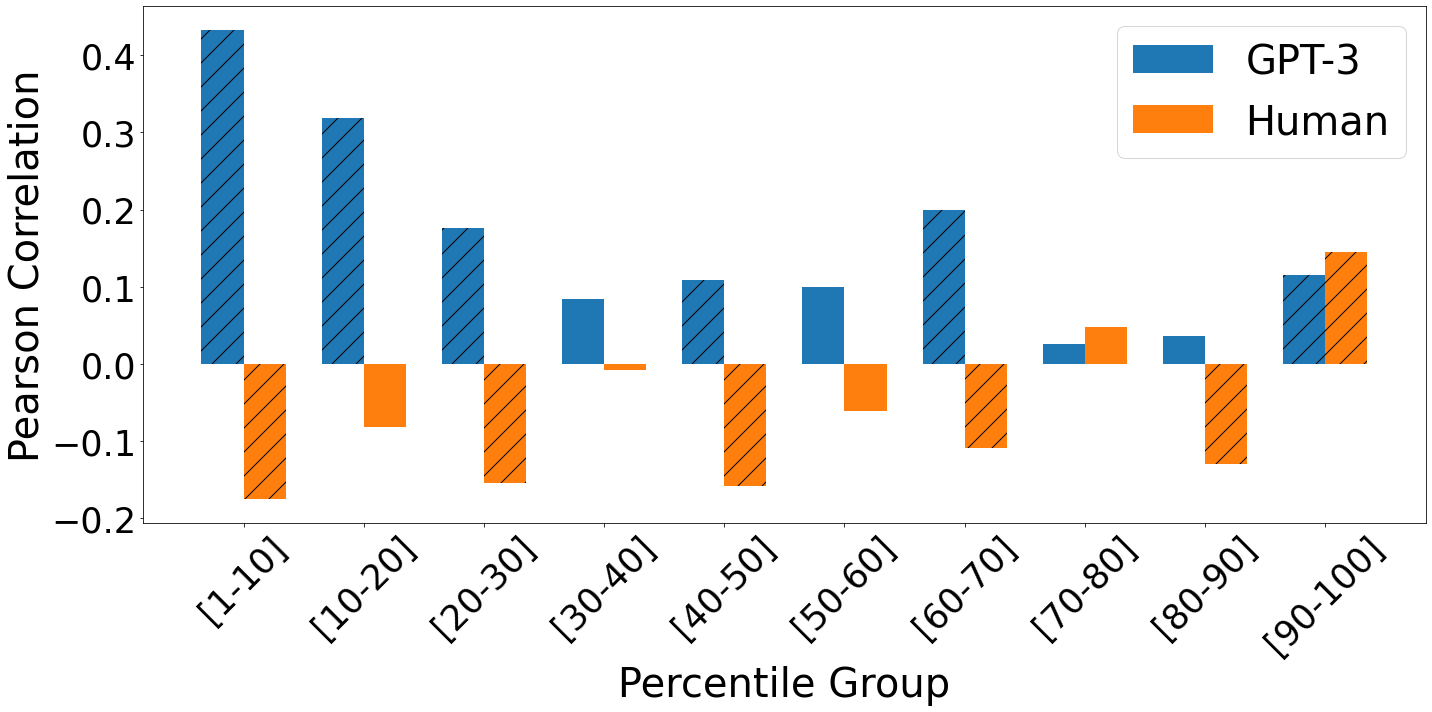

In [27]:
bin_size = len(p2c_emotion_pos_neg_sorted)//10

bin_1 = p2c_emotion_pos_neg_sorted[:bin_size]
bin_2= p2c_emotion_pos_neg_sorted[bin_size:2*bin_size]
bin_3= p2c_emotion_pos_neg_sorted[2*bin_size:3*bin_size]
bin_4= p2c_emotion_pos_neg_sorted[3*bin_size:4*bin_size]
bin_5= p2c_emotion_pos_neg_sorted[4*bin_size:5*bin_size]
bin_6= p2c_emotion_pos_neg_sorted[5*bin_size:6*bin_size]
bin_7= p2c_emotion_pos_neg_sorted[6*bin_size:7*bin_size]
bin_8= p2c_emotion_pos_neg_sorted[7*bin_size:8*bin_size]
bin_9= p2c_emotion_pos_neg_sorted[8*bin_size:9*bin_size]
bin_10= p2c_emotion_pos_neg_sorted[9*bin_size:]

correlations_machine = []
correlations_human= []

for i in range(10):
    curr_bin = eval(f"bin_{i+1}")
    corr_h, _ = stats.pearsonr(curr_bin['win_sent'], curr_bin['subjective_pref'])
    corr_m, _ = stats.pearsonr(curr_bin['win_sent'], curr_bin['generative_pref'])
    correlations_human.append(corr_h)
    correlations_machine.append(corr_m)


df_match = pd.DataFrame({
    'Setup': ['[1-10]', '[10-20]', '[20-30]', '[30-40]', '[40-50]', '[50-60]', '[60-70]', '[70-80]', '[80-90]', '[90-100]'],
    'GPT-3': correlations_machine,
    'Human': correlations_human
})


plt.figure(figsize=(20,10))
bar_width = 0.35
index = range(len(df_match))

textures_human = ['/', '', '/', '', '/', '', '/', '', '/', '/'] # computed based on the below code snippet (p-value for each bin)
textures_machine = ['/', '/', '/', '', '/', '', '/', '', '', '/']


[plt.bar(index[i], df_match['GPT-3'][i], bar_width, color='tab:blue', hatch=textures_machine[i]) for i in range(len(df_match))]
[plt.bar([i + bar_width for i in index][j], df_match['Human'][j], bar_width, color='tab:orange', hatch=textures_human[j]) for j in range(len(df_match))]


handles = [
    Patch(facecolor="#1f77b4", label="GPT-3"),
    Patch(facecolor="#ff7f0e", label="Human")
]

plt.legend(handles=handles, fontsize=40)

plt.xlabel('Percentile Group', fontsize=40)
plt.ylabel('Pearson Correlation', fontsize=40)
# plt.title('Correlation between GPT-3 and Human across Binned Ranges')
plt.xticks([i + bar_width / 2 for i in index], df_match['Setup'], fontsize=35, rotation=45)
plt.yticks(fontsize=35)
# plt.legend(fontsize=40)

plt.axis('on')  # Ensures the axis lines and labels are still shown
plt.grid(False)  # Removes the grid

plt.tight_layout()
# plt.savefig('p2c_lexicon_sidebar.pdf', format='pdf', bbox_inches='tight')
plt.show()


(Optional) Compute p-value for each percentile group to get hatches

-> Only p-value below 0.05 will have its corresponding bar with hatches.

In [28]:
for i in range(10):
    curr_bin = eval(f"bin_{i+1}")
    corr_h, p_h = stats.pearsonr(curr_bin['win_sent'], curr_bin['subjective_pref'])
    corr_m, p_m = stats.pearsonr(curr_bin['win_sent'], curr_bin['generative_pref'])
    
    print(f'bin_{i+1}: {p_h}, {p_m}')

bin_1: 0.001318911161779782, 1.2287008366509574e-16
bin_2: 0.1358767531251922, 2.6355218459314726e-09
bin_3: 0.00468284052951793, 0.001212833466645397
bin_4: 0.8960497105515174, 0.12432946125480256
bin_5: 0.0039509057334561806, 0.04639205138939891
bin_6: 0.26930409352857737, 0.06899307846818391
bin_7: 0.04725690447616736, 0.0002552173832641958
bin_8: 0.3828930891264084, 0.635113507420738
bin_9: 0.0184476468730696, 0.5122856602921273
bin_10: 0.007395007644858132, 0.03350255348990327
